***
$$\mathbf{\text{Author: Kenneth Kusima}}$$<br>
$$\mathbf{\text{Python Kinetics Code}}$$<br>
$\mathbf{\text{Date: 02/01/22}}$<br>
***

***
$\mathbf{\text{Simple Micro Kinetic Model for CO Oxidation}}:$<br>
***
$$\require{mhchem}$$       
---
Overall Reaction: 
$$ CO + \frac{1}{2} O_2 {\stackrel{\tiny{\textrm{Pt/Pd}}}{\rightleftharpoons}} CO_2 $$
---
Note Reations in the Reaction Mechanism may be reversible or irreversible

Reaction 1:&emsp;Adsorption of CO

$$ CO + * \rightleftharpoons CO^{*} $$

Reaction 2:&emsp;Adsorption of $O_2$

$$ O_2 + * \rightleftharpoons {O_2}^{*} $$

Reaction 3:&emsp;Dissociation of ${O_2}^*$ 

$$ {O_2}^* + * \rightleftharpoons 2{O}^* $$

Reaction 4:&emsp;Surface Reaction of $CO$ and $O_2$  

$$ {CO}^{*} + {O}^{*} \rightleftharpoons CO_2 + 2* $$



***
$\mathbf{\text{Modelling Proposed Reaction Mechanism}}:$<br>
***
${{k_i}^j= \textrm{Rate constant/coefficient for reaction i,}} \\  \hspace{0.5cm} \textrm{for j = {f,r} ; where f = forward reaction and r  = the reverse reaction} \\ r_i = \textrm{Rate of reaction for reaction i}$

${\theta_m = \textrm{Surface Coverage of species m}} \\ \sum_{m=1}^{N} \theta_{m} = 1 \\ \hspace{1.3cm} =
\theta_{CO} + \theta_{O_2} + \theta_{O} + \theta_{*}$

### The Atomic/Species Matrix ($\nu$):

The participating species for this surface reaction mechanism are:
1. CO
2. $O_2$
3. $CO_2$
4. $CO^*$
5. $O^*$
6. ${O_2}^*$
7. *

\begin{equation}
\
\nu=\begin{bmatrix}
    &   CO    &   O_2   &   CO_2  &      CO^*    &     O*     &    O_2^*     &   *\\
C   &   1     &   0     &   1     &      1       &     0      &     0        &   0\\
O   &   1     &   2     &   2     &      1       &     1      &     2        &   0\\
*   &   0     &   0     &   0     &      1       &     1      &     1        &   1\end{bmatrix} 
\
\end{equation}

Atomic Matrix Size : (3x7)
### The Stoichiometric Matrix (A):

\begin{equation}
\
A=\begin{bmatrix}
    & P_{CO} & P_{O_2} & P_{CO_2} & \theta_{CO} & \theta_{O} & \theta_{O_2} &\theta_{*}\\
r_1 &  -1     &   0     &   0     &      1       &     0      &     0        &  -1\\
r_2 &   0     &  -1     &   0     &      0       &     0      &     1        &  -1\\
r_3 &   0     &   0     &   0     &      0       &     2      &    -1        &  -1\\     
r_4 &   0     &   0     &   1     &     -1       &    -1      &     0        &   2\end{bmatrix} 
\
\end{equation}

Stoichiometric Matrix Size : (4x7)

Note:

- For Mass to be conserved:
$$\mathbf{A}\mathbf{\nu = 0}$$

$i =$ species

$j =$ reaction

- To find the Rate of reaction of reaction j:

$$ r_j = k_{j,f} \prod_{i_f} P_{i,f} \theta_{i,f}^{\nu_i} - k_{j,r} \prod_{i_r} P_{i,r} \theta_{i,r}^{\nu_i}  $$

- To find the Rate of production of species i:
$$R_{\theta_i}=\frac{d\theta_i}{dt} = \sum_j A_{j,i} \cdot r_j $$

#### Therefore:

Rate Equations:&emsp;

$$r_1 = k_{1}^f \cdot \textrm{P}_{CO} \cdot \theta_{*} - k_{1}^r \cdot \theta_{CO} $$

$$r_2 = k_{2}^f \cdot \textrm{P}_{O_2} \cdot \theta_{*} - k_{2}^r \cdot \theta_{O_{2}} $$

$$r_3 = k_{3}^f \cdot \theta_{O_2} \cdot \theta_{*} - k_{3}^r \cdot \theta_{O}^2 $$

$$r_4 = k_{4}^f \cdot \theta_{CO} \cdot \theta_{O} - k_{4}^r \cdot \textrm{P}_{{CO}_2} \cdot \theta_{*}^2 $$

The Corresponding Differential Equations corresponding to the rate of formations/productions of the different coverages:

$$R_{\theta_{CO}} = \frac{d\theta_{CO}}{dt} = r_1 - r_4$$

$$R_{\theta_{O_2}} = \frac{d\theta_{O_2}}{dt} = r_2 - r_3 $$

$$R_{\theta_{O}} = \frac{d\theta_{O}}{dt} = 2 r_3 - r_4 $$

$$R_{\theta_{*}} = \frac{d\theta_{*}}{dt} = 2 r_4 - r_1 - r_2 - r_3 $$



In [1]:
%matplotlib notebook
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize

In [2]:
Stoich = pd.read_csv("Stoic_Input.csv")    #Opening/Reading the Stoichiometric input file needed to be read
Atomic = pd.read_csv("Atom_Input.csv")     #Opening/Reading the Atomic input file needed to be read
Param = pd.read_csv("Param_Input.csv")     #Opening/Reading the Parameter input file needed to be read   
print("Reaction\Stoichiometric Matrix:\n",Stoich)
print("\n Atomic\Species Matrix:\n",Atomic)
print("\n Parameters Matrix:\n",Param)

Reaction\Stoichiometric Matrix:
   r\S  P_CO  P_O2  P_CO2  theta_CO  theta_O  theta_O2  theta_*
0  r1    -1     0      0         1        0         0       -1
1  r2     0    -1      0         0        0         1       -1
2  r3     0     0      0         0        2        -1       -1
3  r4     0     0      1        -1       -1         0        2

 Atomic\Species Matrix:
   A\S  CO  O2  CO2  CO*  O*  O2*  *
0   C   1   0    1    1   0    0  0
1   O   1   2    2    1   1    2  0
2   *   0   0    0    1   1    1  1

 Parameters Matrix:
    Reaction  Parameter        Values        Units
0       NaN       Temp  3.200000e+02            K
1       NaN   Pressure  1.000000e-08          bar
2       NaN  Gas Const  8.314460e+00  JK^-1mol^-1
3        r1        k1f  2.000000e+00            -
4       NaN        k1r  6.650000e-09            -
5        r2        k2f  2.310000e+02            -
6       NaN        k2r  1.150000e+05            -
7        r3        k3f  6.130000e+08            -
8       Na

In [3]:
#Checking the mass balance
at_mat = Atomic.iloc[0:,1:]           #The atomic matrix
err = 0                               #For counting error
for i in np.arange(len(Stoich)):    
    st_mat = Stoich.iloc[i,1:]        #The stoichiometric matrix
    res = np.dot(at_mat,st_mat)       #Performing the matrix product for every reaction i
    if any(a != 0 for a in res):      #Verifies that the matrix product returns 0s (i.e mass is balanced)
        print("Mass is not conserved in reaction %i. \n ... Check and correct the Atomic or Stoichiometric Matrices"%(i+1))
        err +=1
    elif (i == len(Stoich)-1 and err==0):    
        print("Mass is conserved.")

Mass is conserved.


In [4]:
#Extracting K values
def kextract(Param):
    #Evaluating Param file to find where the list of rate constants k starts
    for j in np.arange(len(Param.iloc[:,1])):
        if ('k1f' or 'k1') in Param.iloc[j,1]:
            kstart = j #Row in the Param file where rate constants begin
            break
        else:
            continue

    #Rate Constants:
    k = Param.iloc[kstart:,2].values #.values changes from pandas series to numpy array, allows for more optimization
    return k

In [5]:
def sol(t,u,k,Atomic,Stoich):
    #Only need to change:
   
    #------------------------------------------
    # 1 = CO ; 2 = O ; 3 = O2 ; 4 = *
    #Surface Coverage 
    th1 = u[0] #Theta_CO 
    th2 = u[1] #Theta_O
    th3 = u[2] #Theta_O2
    th4 = u[3] #Theta_*
    THETA = [th1,th2,th3,th4] #Coverages being investigated
        #Partial Pressures (Assuming all same as P)
    P1 = Param.iloc[1,2]#P_CO
    P2 = Param.iloc[1,2]#P_O2
    P3 = Param.iloc[1,2]#P_CO2
    #------------------------------------------
    
    Nr = len(Stoich) #Number of rows in your your stoich matrix, i.e (Number of reactions)
    

    kf = k[0::2] #Pulling out the forward rxn rate constants (::2 means every other value, skip by a step of 2)
    kr = k[1::2] #Pulling out the reverse rxn rate constants 

    D = []      #Empty Vector For holding rate of change of coverage values
    r = [None] * Nr  #Empty Vector for holding rate of a specific reaction
    
    #Calculating the rates of reactions:
    for j in np.arange(Nr):   #Looping through the reactions
        matr = [P1,P2,P3]+THETA
        fwd = []
        rvs = []
        for i in np.arange(len(Stoich.iloc[0,:])-1):
            if Stoich.iloc[j,i+1]<0: #extracting only forward relevant rate parameters  #forward rxn reactants /encounter probability
                fwd.append(matr[i]**abs(Stoich.iloc[j,i+1]))
                
            if Stoich.iloc[j,i+1]>0: #extracting only reverse relevant rate parameters  #reverse rxn reactants /encounter probability
                rvs.append(matr[i]**abs(Stoich.iloc[j,i+1]))   
                
        r[j] = (kf[j]*np.prod(fwd)) - (kr[j]*np.prod(rvs)) #Calculating the rate of reaction
    

    #Differential Equations to calculate the change in coverages
    for i in np.arange(len(Stoich.iloc[:,4:])):
        dsum=0
        for j in np.arange(Nr):
            
            dsum += Stoich.iloc[j,i+4]*r[j] #Calculating the rate of production of a species i
        
        D.append(dsum)

    return D  #   CO |  O  |  O2   |  *




Running the ODE solver: (Getting the coverage profiles)

In [6]:
%%time
#initial values:
TCO_in = 0.0
TO_in = 0.0
TO2_in = 0.0
TE_in = 1 - TCO_in-TO_in-TO2_in
#init      CO | O  | O2   | *
init = [TCO_in,TO_in,TO2_in,TE_in]  #initial values

k = kextract(Param)
actual = k #To be used to compare prediction
Time =np.linspace(0, 6e6, num=1000)
t_span = (Time[0], Time[-1])
solve = solve_ivp(sol,t_span,init, args=(k,Atomic,Stoich),method='BDF', t_eval=Time, rtol = 1E-6,atol = 1E-8,h0 = 1E-50)#Obtaining the resulting Concentration of Coverages
solv = np.transpose(solve.y)
time_sol = np.transpose(solve.t)
Conc = solv
print(len(solve.t))

/Users/klkusima/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `h0`.
  warn("The following arguments have no effect for a chosen solver: {}."


1000
CPU times: user 967 ms, sys: 12.7 ms, total: 980 ms
Wall time: 1 s


Plotting:

<IPython.core.display.Javascript object>


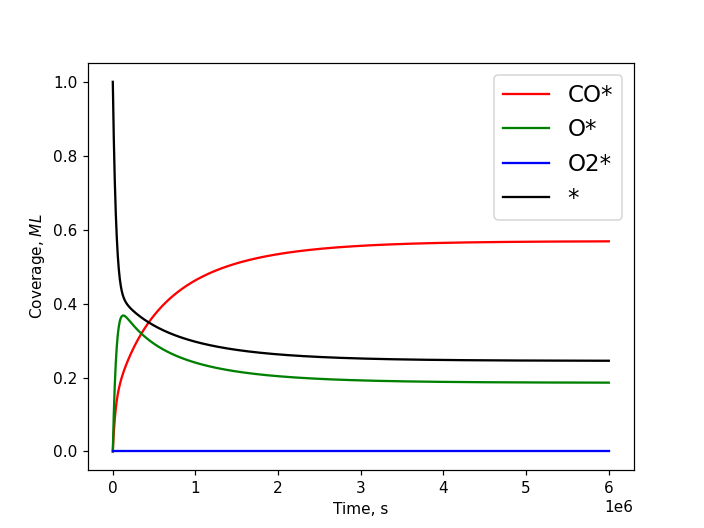

In [7]:
%matplotlib notebook
C_CO = solv[:,0]
C_O = solv[:,1]
C_O2 = solv[:,2]
C_E = solv[:,3]

plt.figure(1)
plt.plot(time_sol, C_CO,'r-', label='CO*')        
plt.plot(time_sol, C_O,'g-', label='O*') 
plt.plot(time_sol, C_O2, 'b-', label='O2*') 
plt.plot(time_sol, C_E, 'k-', label='*') 

plt.xlabel('Time, s')
plt.ylabel("Coverage, $ML$")
plt.legend(fontsize=15, loc='best')
plt.show()

In [8]:
def Kinetics(Time,Params,con,Atomic,Stoich,init,Teval,Guessk):
#x = input times   ; y = input coverages (to be fitted)
    v = Params.valuesdict()
    fit_params_array = np.empty(len(Guessk))
    for i in np.arange(len(Guessk)):
        fit_params_array[i] = v['k'+str(i+1)]
        
    t_span = (Time[0], Time[-1])
    solve = solve_ivp(sol,t_span,init, args=(fit_params_array,Atomic,Stoich),method='BDF', t_eval=Teval, rtol = 1E-6,atol = 1E-8)
    solv = np.transpose(solve.y)
    #print(k)
    return solv

In [9]:
Guess_Param = pd.read_csv("Param_Input_Guess.csv")     #Opening/Reading the Parameter input file needed to be read   
print("\n The Guess Parameters Matrix:\n",Guess_Param)
print("\n")


 The Guess Parameters Matrix:
    Reaction  Parameter        Values        Units
0       NaN       Temp  3.200000e+02            K
1       NaN   Pressure  1.000000e-08          bar
2       NaN  Gas Const  8.314460e+00  JK^-1mol^-1
3        r1        k1f  1.000000e+00            -
4       NaN        k1r  1.000000e-09            -
5        r2        k2f  1.000000e+02            -
6       NaN        k2r  1.000000e+05            -
7        r3        k3f  1.000000e+08            -
8       NaN        k3r  1.000000e-04            -
9        r4        k4f  1.000000e-08            -
10      NaN        k4r  1.000000e+02            -




In [10]:
Guessk = kextract(Guess_Param)

$$ error = \left <(c_{pred} - c_{actual})^2 \right> $$

In [22]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit import Model, Parameter, report_fit
from lmfit import Parameters

x = np.linspace(0, 6e6, num=1000)
y = Conc #

model = Model(Kinetics,independent_vars=['Time','con','Atomic','Stoich','init','Teval','Guessk']) #Kinetics(Time,Params,con,Atomic,Stoich,init,Teval)

param = model.make_params(Params = Guessk.all())
    
parameters = Parameters()

for i in np.arange(len(Guessk)):
    parameters.add(name='k'+str(i+1), value=(Guessk[i]), min=0, max=int(1e15) )
    
print(parameters)       

result = model.fit(y, Params=params, method='leastsq',  Time=x, con=Conc, Atomic=Atomic,Stoich=Stoich,init=init,Teval=x,Guessk=Guessk)


print(result.values)

result.plot()

# result.params.pretty_print()

# print(result.fit_report(min_correl=0.5))

# comps = result.eval_components(x=x)
# dely = result.eval_uncertainty(sigma=3)

# fig, axes = plt.subplots(2, 2, figsize=(12.8, 9.6))

# axes[0][0].plot(x, y, 'o', color='#99002299', markersize=3, label='data')
# axes[0][0].plot(x, result.best_fit, '-', label='best fit')
# axes[0][0].plot(x, result.init_fit, '--', label='initial fit')
# axes[0][0].set_title('data, initial fit, and best-fit')
# axes[0][0].legend()

# axes[0][1].plot(x, y, 'o', color='#99002299', markersize=3, label='data')
# axes[0][1].plot(x, result.best_fit, '-', label='best fit')
# axes[0][1].fill_between(x, result.best_fit-dely, result.best_fit+dely,
#                         color="#8A8A8A", label=r'3-$\sigma$ band')
# axes[0][1].set_title('data, best-fit, and uncertainty band')
# axes[0][1].legend()

# axes[1][0].plot(x, result.best_fit, '-', label=r'best fit, 3-$\sigma$ band')
# axes[1][0].fill_between(x,
#                         result.best_fit-result.dely,
#                         result.best_fit+result.dely,
#                         color="#8A8A8A")

plt.show()

Parameters([('k1', <Parameter 'k1', value=1.0, bounds=[0:1000000000000000]>), ('k2', <Parameter 'k2', value=1e-09, bounds=[0:1000000000000000]>), ('k3', <Parameter 'k3', value=100.0, bounds=[0:1000000000000000]>), ('k4', <Parameter 'k4', value=100000.0, bounds=[0:1000000000000000]>), ('k5', <Parameter 'k5', value=100000000.0, bounds=[0:1000000000000000]>), ('k6', <Parameter 'k6', value=0.0001, bounds=[0:1000000000000000]>), ('k7', <Parameter 'k7', value=1e-08, bounds=[0:1000000000000000]>), ('k8', <Parameter 'k8', value=100.0, bounds=[0:1000000000000000]>)])


TypeError: '>' not supported between instances of 'list' and 'float'

In [ ]:
import numpy as np
from pandas import Series

from lmfit import Model, Parameter, report_fit

def decay(t, N, tau):
    return N*np.exp(-t/tau)

t = np.linspace(0, 5, num=1000)
np.random.seed(2021)
data = decay(t, 7, 3) + np.random.randn(t.size)

model = Model(decay, independent_vars=['t'])
result = model.fit(data, t=t, N=10, tau=1)

print(result.values)

result.plot()

result.params.pretty_print()




In [ ]:
Kinetics(Time,parameters,Conc,Atomic,Stoich,init,Time)

In [19]:
params

name,value,initial value,min,max,vary
Params,1.00000000,None,-inf,inf,True
